# << Made by Cristiano Dos Anjos >> 

cristianodosanjos019@gmail.com

### ...

# This is the first part of a churn modeling's project using machine learning.

#### Our objective in this project is create a model of machine learning that go to show us who customers will exit of out Bank.

In this part of the project we are going to use libraries for explore and get good informations, at the final we will create a report list.

#### About this dataset...

+ We will use a file of a unknow bank, I got this data from kaggle website.

Context:
A dataset which contain some customers who are withdrawing their account from the bank due to some loss and other issues with the help this data we try to analyse and maintain accuracy.

Content:
What's inside is more than just rows and columns. Make it easy for others to get started by describing how you acquired the data and what time period it represents, too.

#### Let's get started.

#### Importing lbraries...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df2 = pd.read_csv('/home/tyrslayer/Downloads/Churn Modeling2.csv')

#### Exploring and modeling our new variable called df2...

In [3]:
  df2.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df2.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

The column Exited is our tagert. We will use as params the columns CreditScore, Geagraphy, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember and the column EstimatedSalary.

In [5]:
df2.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Looking above, we can see that our dataset haven't any missing data.

#### Looking for relevant informations...

In [6]:
display(df2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
df2.groupby('Geography')['Exited'].sum()

Geography
France     810
Germany    814
Spain      413
Name: Exited, dtype: int64

In [8]:
len(df2)

10000

We need to create a column for find out how many customers had exited from our company according to columns Gender and Geography.

In [9]:
df1 = df2
df1['For-sum'] = 1

In [10]:
df1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,For-sum
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1


Using the new column 'For-sum' we are going to catch some informations.

In [11]:
df1.groupby('Geography')['For-sum'].sum()

Geography
France     5014
Germany    2509
Spain      2477
Name: For-sum, dtype: int64

In [12]:
df1.groupby('Gender')['For-sum'].sum()

Gender
Female    4543
Male      5457
Name: For-sum, dtype: int64

<Figure size 1008x648 with 0 Axes>

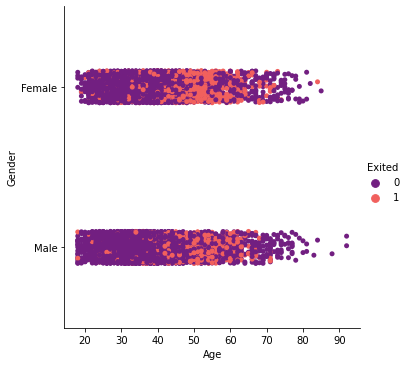

In [13]:
plt.figure(figsize=(14,9))
sns.catplot(x='Age', y='Gender', hue='Exited', palette=sns.color_palette('magma', 2), data=df1)
plt.show()

Now I judge suitable create a algorithm to get a automation of some steps on data modeling.

In [14]:
df1.tail(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,For-sum
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,1


In [15]:
def DescribingResults(data, c1, c2, d1, d2):
    ll = data[data[c1]==c2]
    result = ll[ll[d1]==d2]
    return result 

In [16]:
n_exitedf = DescribingResults(df1, 'Gender', 'Female', 'Exited', 1)

In [17]:
n_exitedf.groupby('Gender')['For-sum'].sum()

Gender
Female    1139
Name: For-sum, dtype: int64

Our algorithm its working perfectly :)

Let's keep going...

In [18]:
n_notexitedf = DescribingResults(df1, 'Gender', 'Female', 'Exited', 0)
n_notexitedf.groupby('Gender')['For-sum'].sum()

Gender
Female    3404
Name: For-sum, dtype: int64

In [19]:
n_exitedm = DescribingResults(df1, 'Gender', 'Male', 'Exited', 1)
n_exitedm.groupby('Gender')['For-sum'].sum()

Gender
Male    898
Name: For-sum, dtype: int64

In [20]:
n_notexitedm = DescribingResults(df1, 'Gender', 'Male', 'Exited', 0)
n_notexitedm.groupby('Gender')['For-sum'].sum()

Gender
Male    4559
Name: For-sum, dtype: int64

Let's calculate some percentage for figure out future conclusions.

In [21]:
len(df1)

10000

In [22]:
(10000*45)/100

4500.0

In [23]:
(10000*8)/100

800.0

In [24]:
(10000*34)/100

3400.0

In [25]:
(10000*11)/100

1100.0

Every information found go to be hold for the final of this project. 

Let's keep exploring...

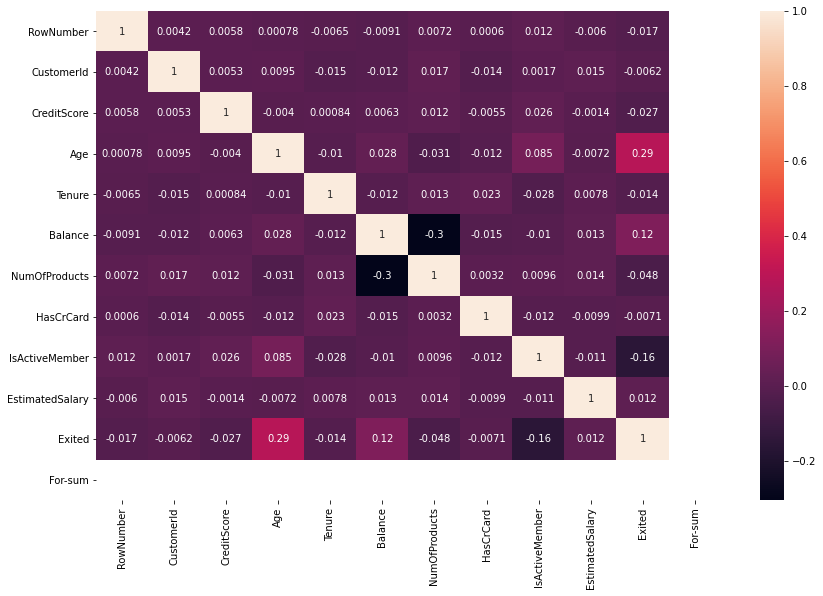

In [26]:
plt.figure(figsize=(14,9))
sns.heatmap(df1.corr(), annot=True)
plt.show()

The method above is showing us the correlation from our dataset. With the block above, we can see that the other columns don't have a high correlation with the column 'Exited'.

In [35]:
df1.tail(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,For-sum
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,1


Now let's see search and get results from the column 'Geography'.

In [36]:
df1.groupby('Geography')['For-sum'].sum()

Geography
France     5014
Germany    2509
Spain      2477
Name: For-sum, dtype: int64

Using our algorithm, we can reach our target quickly.

In [37]:
exitedfrance = DescribingResults(df1, 'Geography', 'France', 'Exited', 1)
notexitedfrance = DescribingResults(df1, 'Geography', 'France', 'Exited', 0)
print(exitedfrance.groupby('Geography')['For-sum'].sum(), notexitedfrance.groupby('Geography')['For-sum'].sum())

Geography
France    810
Name: For-sum, dtype: int64 Geography
France    4204
Name: For-sum, dtype: int64


In [38]:
exitedspain = DescribingResults(df1, 'Geography', 'Spain', 'Exited', 1)
notexitedspain = DescribingResults(df1, 'Geography', 'Spain', 'Exited', 0)
print(exitedspain.groupby('Geography')['For-sum'].sum(), notexitedspain.groupby('Geography')['For-sum'].sum())

Geography
Spain    413
Name: For-sum, dtype: int64 Geography
Spain    2064
Name: For-sum, dtype: int64


In [39]:
exitedgermany = DescribingResults(df1, 'Geography', 'Germany', 'Exited', 1)
notexitedgermany = DescribingResults(df1, 'Geography', 'Germany', 'Exited', 0)
print(exitedgermany.groupby('Geography')['For-sum'].sum(), notexitedgermany.groupby('Geography')['For-sum'].sum())

Geography
Germany    814
Name: For-sum, dtype: int64 Geography
Germany    1695
Name: For-sum, dtype: int64


In [42]:
df1.to_csv('ChurnFile.csv')

...

## Adquired informations:

+ This dataset have ten thousand of lines and fourteen columns.

+ The dataset have 5457 men and 4543 women.

+ This data have 5014 customers from France, 2509 from Germany and 2477 customers from Spain.

+ 1199 women had exited from our bank, 11% from our dataset. 3404 women will stay on our bank, 34% from our dataset.

+ 898 men had exited from our bank, 8% from our dataset. 4559 men will stay on our bank, 45% from our dataset.

+ More than 50% of our 10000 customers are from France, that is 5014.

+ More than 25% of our 10000 customers are from Germany, that is 2477.

+ More than 24% of our 10000  customers are from France, 5014 of our customers are from France.

+ From France, 810 of the french will leave and 4204 will stay on our bank.

+ From Germany, 814 of the germans will leave and 1695 will stay on our bank.

+ From Spain, 413 of the spanish will leave and 2064 will stay on our bank.

### At the second part of this project, we are going to create a machine learning model for deliver who is the customer that want to get out from our bank.

### >>>